In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# create bandgap DataFrame
df = {
    "x":np.linspace(0,1,13),
    "GGA":[1.523,1.547,1.561,1.575,1.643,1.599,1.624,1.672,1.698,1.722,1.760,1.806,1.844], 
    "HSE06":[2.116, 2.152, 2.175, 2.200, 2.277, 2.246, 2.286, 2.350, 2.383, 2.422, 2.472, 2.531, 2.587],
    "HSE43":[2.534, 2.579, 2.608, 2.638, 2.722, 2.696, 2.746, 2.82, 2.857, 2.904, 2.961, 3.028, 3.094]
}

df = pd.DataFrame(df)

# input computed value with different functionals
df.at[0, "prim_HSE06"] = 1.788
df.at[12, "prim_HSE06"] = 2.238
df.at[0, "prim_HSE43"] = 2.189
df.at[12, "prim_HSE43"] = 2.730
df.at[0, "prim_SOC06"] = 0.731
df.at[12, "prim_SOC06"] = 1.270
df.at[0, "prim_SOC43"] = 1.195
df.at[12, "prim_SOC43"] = 1.806

# calculate correction of functionals
df["c43_06"] = (df.prim_HSE43-df.prim_HSE06+df.prim_SOC43-df.prim_SOC06)/2
df["SOC_HSE"] = (df.prim_SOC06-df.prim_HSE06+df.prim_SOC43-df.prim_HSE43)/2
correction_43_06 = df.c43_06.mean()
correction_SOC_HSE = df.SOC_HSE.mean()

# create corrected HSE06 and HSE43
df["HSE06corrected"] = df.HSE06 + correction_43_06 + correction_SOC_HSE
df["HSE43corrected"] = df.HSE43 + correction_SOC_HSE

# create corrected bandgap DataFrame and remove error Br4I8
bg = pd.DataFrame({"corrected_HSE06": df.HSE06corrected,
                  "corrected_HSE43": df.HSE43corrected})
bg["x"] = np.linspace(0,1,13)
bg = bg.drop(index = 4)

#compute fitting coefficient of corrected bandgap
coe_HSE06 = np.polyfit(bg.x, bg.corrected_HSE06, 2)
fit_HSE06 = np.poly1d(coe_HSE06)
coe_HSE43 = np.polyfit(bg.x, bg.corrected_HSE43, 2)
fit_HSE43 = np.poly1d(coe_HSE43)

# create exp DataFrame
exp = {
    "x": [0,0.1,0.2,0.6,0.7,0.8,0.9,1],
    "bandgap":[1.48,1.56,1.58,1.88,1.95,2.04,2.12,2.23]
}
exp = pd.DataFrame(exp)

# compute fitting coefficient of exp
coe_exp = np.polyfit(exp.x, exp.bandgap, 2)
fit_exp = np.poly1d(coe_exp)

# calculating three bandgap bowing parameter b
bg["b_HSE06"] = bg.corrected_HSE06[0] / bg.x + bg.corrected_HSE06[12] / (1-bg.x) - bg.corrected_HSE06 / (bg.x*(1-bg.x))
bg["b_HSE43"] = bg.corrected_HSE43[0] / bg.x + bg.corrected_HSE43[12] / (1-bg.x) - bg.corrected_HSE43 / (bg.x*(1-bg.x))
exp["b"] = exp.bandgap[0] / exp.x + exp.bandgap[7] / (1-exp.x) - exp.bandgap / (exp.x*(1-exp.x))

# compute b mean value
HSE06_mean = bg.b_HSE06.mean()
HSE43_mean = bg.b_HSE43.mean()
exp_mean = exp.b.mean()

b_HSE06 mean value is  0.20107467532467566
b_HSE43 mean value is  0.2117675757575749
exp mean value is  0.22767857142857192


In [5]:
print("df is", df)
print("bg is", bg)
print("exp is", exp)
print("correction 43-06 is", correction_43_06)
print("correction SOC-HSE is", correction_SOC_HSE)
print("b_HSE06 mean value is ", HSE06_mean)
print("b_HSE43 mean value is ", HSE43_mean)
print("exp mean value is ", exp_mean)

df is            x    GGA  HSE06  HSE43  prim_HSE06  prim_HSE43  prim_SOC06  \
0   0.000000  1.523  2.116  2.534       1.788       2.189       0.731   
1   0.083333  1.547  2.152  2.579         NaN         NaN         NaN   
2   0.166667  1.561  2.175  2.608         NaN         NaN         NaN   
3   0.250000  1.575  2.200  2.638         NaN         NaN         NaN   
4   0.333333  1.643  2.277  2.722         NaN         NaN         NaN   
5   0.416667  1.599  2.246  2.696         NaN         NaN         NaN   
6   0.500000  1.624  2.286  2.746         NaN         NaN         NaN   
7   0.583333  1.672  2.350  2.820         NaN         NaN         NaN   
8   0.666667  1.698  2.383  2.857         NaN         NaN         NaN   
9   0.750000  1.722  2.422  2.904         NaN         NaN         NaN   
10  0.833333  1.760  2.472  2.961         NaN         NaN         NaN   
11  0.916667  1.806  2.531  3.028         NaN         NaN         NaN   
12  1.000000  1.844  2.587  3.094       2.238

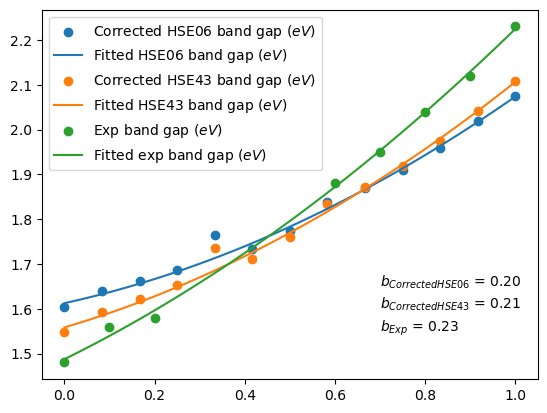

In [19]:
plt.scatter(df.x, df['HSE06corrected'], label = 'Corrected HSE06 band gap ($eV$)')
plt.plot(np.linspace(0,1,100), fit_HSE06(np.linspace(0,1,100)), label = "Fitted HSE06 band gap ($eV$)")
plt.scatter(df.x, df['HSE43corrected'], label = 'Corrected HSE43 band gap ($eV$)')
plt.plot(np.linspace(0,1,100), fit_HSE43(np.linspace(0,1,100)), label = "Fitted HSE43 band gap ($eV$)")
plt.scatter(exp.x, exp.bandgap, label = "Exp band gap ($eV$)")
plt.plot(np.linspace(0,1,100), fit_exp(np.linspace(0,1,100)), label = "Fitted exp band gap ($eV$)")
plt.text(0.7, 1.65, "$b_{Corrected HSE06}$ = 0.20")
plt.text(0.7, 1.6, "$b_{Corrected HSE43}$ = 0.21")
plt.text(0.7, 1.55, "$b_{Exp}$ = 0.23")
plt.legend()